<a href="https://colab.research.google.com/github/Shazaib001/7PAM2000-Applied-Data-Science-2-Assignment-2-Statistics-and-trends./blob/main/Assignment_2_Statistics_and_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MultiIndex([(                'Afghanistan', ...),
            (                'Afghanistan', ...),
            (                'Afghanistan', ...),
            (                'Afghanistan', ...),
            ('Africa Eastern and Southern', ...),
            ('Africa Eastern and Southern', ...),
            ('Africa Eastern and Southern', ...),
            ('Africa Eastern and Southern', ...),
            ( 'Africa Western and Central', ...),
            ( 'Africa Western and Central', ...),
            ...
            (                'Yemen, Rep.', ...),
            (                     'Zambia', ...),
            (                     'Zambia', ...),
            (                     'Zambia', ...),
            (                     'Zambia', ...),
            (                     'Zambia', ...),
            (                   'Zimbabwe', ...),
            (                   'Zimbabwe', ...),
            (                   'Zimbabwe', ...),
            (                   'Z

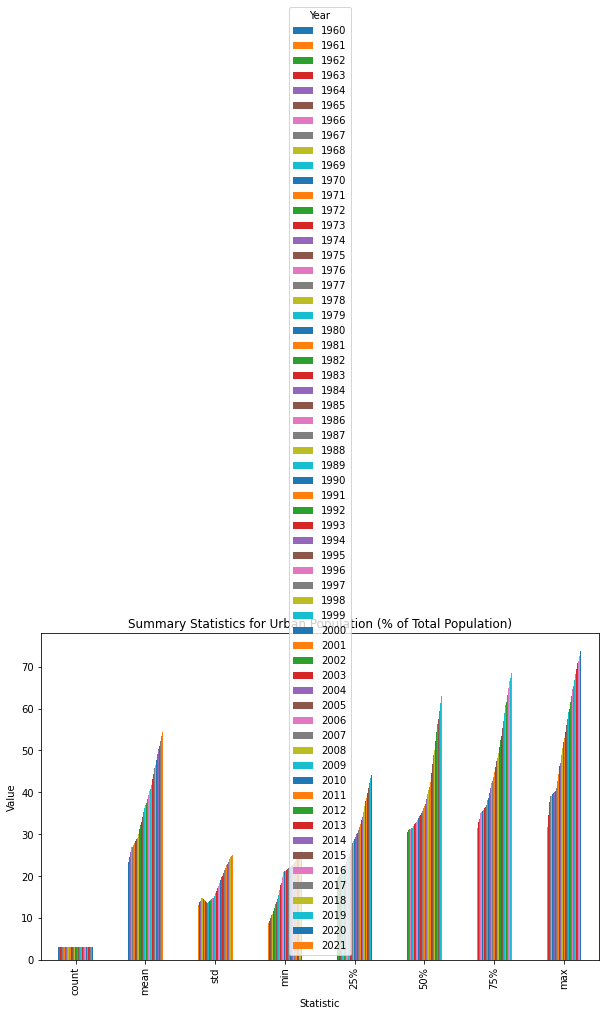

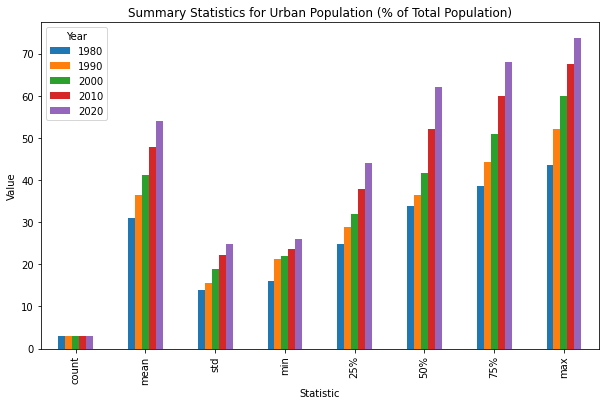

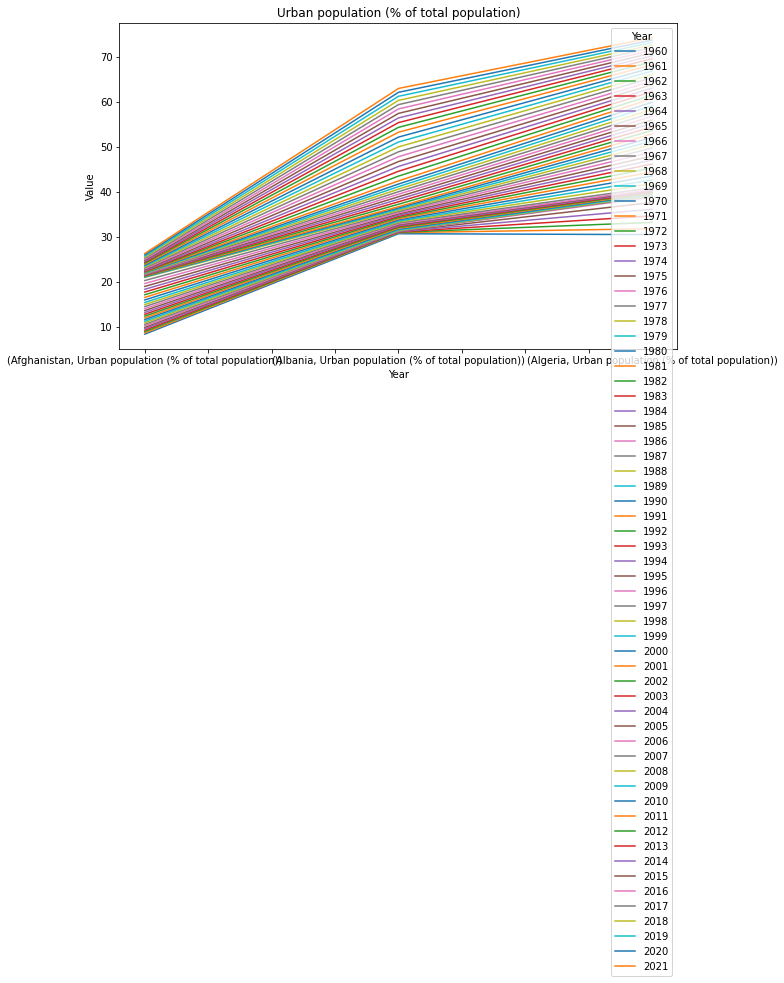

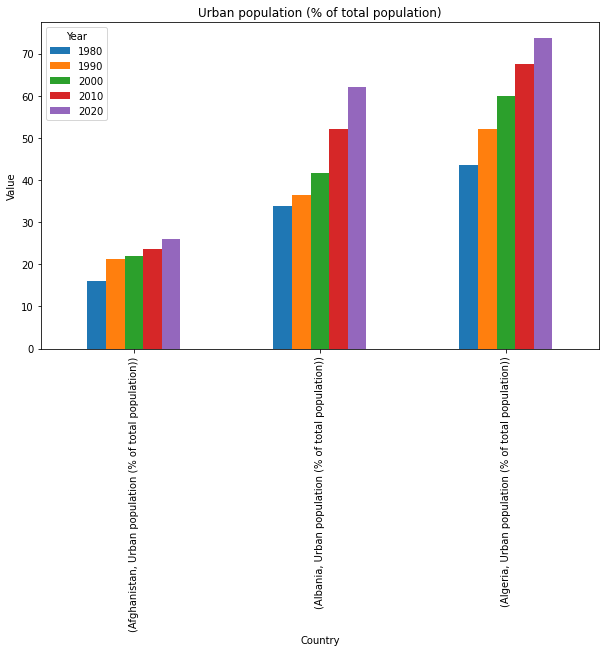

Correlation between Urban population (% of total population) and Urban population is nan


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def read_worldbank_data(file_name):
    # read in csv file and create dataframe while skipping first 4 rows
    df = pd.read_csv(file_name, skiprows=4)

    # reshape dataframe by melting the year columns and creating a new column for year and value
    df_melt = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value')
    df_melt.isnull().sum()
    # filter out rows with 'Unnamed: 66' in the Year column
    df_melt = df_melt[df_melt['Year'] != 'Unnamed: 66']

    # convert year column to int
    df_melt['Year'] = df_melt['Year'].astype(int)

    # create dataframe with years as columns
    df_year = df_melt.pivot_table(values='Value', index=['Country Name', 'Indicator Name'], columns='Year')

    # create dataframe with countries as columns
    df_country = df_melt.pivot_table(values='Value', index='Year', columns=['Country Name', 'Indicator Name'])
  

   


    return df_year, df_country

# call the function to read the data
file_name = '/content/countrybycountry.csv'
df_year, df_country = read_worldbank_data(file_name)
df_year.dropna(inplace=True)
df_country.dropna(inplace=True)

print(df_year.index)


# statistical properties of indicators of interest
# indicator_name = 'Urban population (% of total population)'

# cross-compare between individual countries and/or the whole world
countries = ['Afghanistan', 'Albania', 'Algeria']

indicator_name = 'Urban population (% of total population)'
# filter dataframe by country name and indicator name
df_select_countries = df_year.loc[(df_year.index.get_level_values(0).isin(countries)) & (df_year.index.get_level_values(1) == indicator_name)]

# calculate summary statistics for the selected countries
country_stats = df_select_countries.describe()
print(country_stats)
# create a bar plot of the summary statistics
country_stats.plot.bar(title = 'Summary Statistics for Urban Population (% of Total Population)')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()


years_of_interest = [1980,1990,2000,2010,2020]
country_stats_subset = country_stats.loc[:, country_stats.columns.isin(years_of_interest)]
country_stats_subset.plot(kind='bar', title = 'Summary Statistics for Urban Population (% of Total Population)')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()

# visualizing the data
df_select_countries.plot(kind='line', title = indicator_name)
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

years_of_interest = [1980,1990,2000,2010,2020]
df_select_countries_subset = df_select_countries.loc[:, df_select_countries.columns.isin(years_of_interest)]
df_select_countries_subset.plot(kind='bar', title = indicator_name)
plt.xlabel('Country')
plt.ylabel('Value')
plt.show()


indicator1 = 'Urban population (% of total population)'
indicator2 = 'Urban population'

if indicator1 in df_year.index.get_level_values(1) and indicator2 in df_year.index.get_level_values(1):
    # filter dataframe by indicator name
    df_indicator1 = df_year[df_year.index.get_level_values(1) == indicator1]
    df_indicator2 = df_year[df_year.index.get_level_values(1) == indicator2]
    # calculate correlation
    
    correlation = df_indicator1.iloc[:, df_indicator1.columns.get_loc(2021)].corr(df_indicator2.iloc[:, df_indicator2.columns.get_loc(2021)])

    print(f'Correlation between {indicator1} and {indicator2} is {correlation}')
else:
    print(f"One or both of the indicators {indicator1} and {indicator2} are not in the dataframe.")


# df_year[[indicator1, indicator2]].plot(kind='line', title = 'Correlation between indicators')
# plt.xlabel('Year')
# plt.ylabel('Value')
# plt.show()

